In [1]:
import numpy as np
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

def read_timings():
    tdict = {}
    tsumdict = {}
    with open("timings.dat", "r") as f:
        lines = f.readlines()
        names = []
        vals = []
        for line in  lines:
            toks = line.split()
            tdict[toks[0]] = float(toks[1])
            tsumdict[toks[0]] = float(toks[2])
    return tdict,tsumdict



In [2]:
df_per_result = pd.DataFrame()
df_total_time = pd.DataFrame()
xval = [1024 ,2048,4096,8192,16384,32768,65536] 

for v in xval:
    subprocess.call("python generate_coords.py {}".format(v), shell=True)
    subprocess.call("./build/timings data.txt 100000", shell=True)
    tdict_v, tsumdict_v = read_timings()
    df_per_result = df_per_result.append(tdict_v,ignore_index=True)
    df_total_time = df_total_time.append(tsumdict_v,ignore_index=True)
    subprocess.call("rm timings.dat", shell=True)

In [9]:
index = {}
names = list(tdict_v.keys())
for i in range(len(xval)):
    index[i] = xval[i]

df_per_result = df_per_result.rename(index=index)
print(df_per_result)
df_total_time = df_total_time.rename(index=index)
print(df_per_result)
index

                FMA           MDA           MDT          NINT       Vanilla  \
1024   1.509140e-09  1.153330e-08  7.074790e-09  1.535330e-09  9.585740e-09   
2048   1.784680e-09  1.429970e-08  8.690050e-09  1.786500e-09  1.172960e-08   
4096   2.087560e-09  1.716600e-08  1.006920e-08  2.136340e-09  1.418850e-08   
8192   3.130680e-09  2.544910e-08  1.530220e-08  3.152410e-09  2.019210e-08   
16384  3.384260e-09  2.608990e-08  1.571550e-08  3.358690e-09  2.078720e-08   
32768  3.175080e-09  2.537280e-08  1.513550e-08  3.289370e-09  2.090550e-08   
65536  3.880700e-09  2.912630e-08  1.767720e-08  4.044550e-09  2.406240e-08   

                XMM  
1024   1.555080e-09  
2048   1.905350e-09  
4096   2.246070e-09  
8192   3.381790e-09  
16384  3.441690e-09  
32768  3.450040e-09  
65536  4.297710e-09  
                FMA           MDA           MDT          NINT       Vanilla  \
1024   1.509140e-09  1.153330e-08  7.074790e-09  1.535330e-09  9.585740e-09   
2048   1.784680e-09  1.429970e-08

{0: 1024, 1: 2048, 2: 4096, 3: 8192, 4: 16384, 5: 32768, 6: 65536}

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

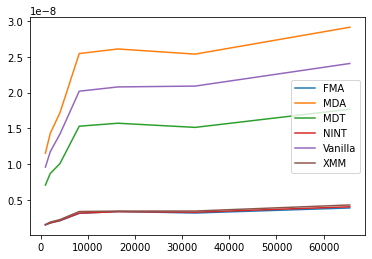

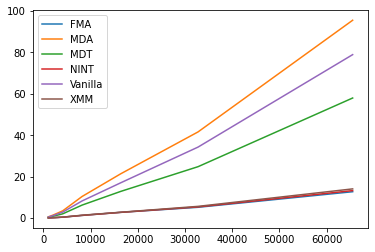

In [10]:
plt.figure()
df_per_result.plot()
df_total_time.plot()
